# Dimensionality Reduction
[![Run in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/bobmh43/handson_ml/blob/master/notebooks/ch8_dimensionality_reduction.ipynb)

# End of chapter Questions (Modified)

## General idea behind dimensionality reduction:
*1. What are the main motivations for reducing a dataset's dimensionality? What are the main drawbacks?*

Motivations:
- speed up training, as training algorithms may have polynomial time complexity with respect to the number of input features
- may also remove noise and redundant features
- To visualize a dataset and see its clusters
- To save sapce (compression)

Drawbacks:
- loss of information, potentially degrading subsequent training algorithms
- computationally intensive
- transformed features are hard to interpret.

Another potential drawback is that in some situations, the machine learning task may become more complex after dimensionality reduction (eg. the swiss roll example in the book).

*2. What is the curse of dimensionality?*

The curse of dimensionality refers to challenges that arise when working with data in high-dimensional spaces, such as data sparsity, overfitting, computational cost and the meaninglessness of distance metrics (all points are about equidistant).

*3. Once a dataset's dimensionality has been reduced, is it possible to reverse the operation?*

No, some information is lost. Furthermore, alhtough some algorithms such as PCA have simple reverse transforms, many others do not (eg. kernel PCA, t-SNE).

## Two kinds of Dimensionality Reduction Algorithms:
- Projection: assumes the data is roughly a hyperplane (PCA) (kernel PCA first lifts it into even higher-dimensional space)
- Manifold Learning: assumes the data is roughly a lower-dimensional manifold in the high dimensional space. (LLE, MDS, isomap, t-SNE).

## Specifics about PCA

*4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?*

PCA assumes that the dataset is roughly a hyperplane, finds the best such hyperplane and projects the data onto it. Performing PCA on a nonlinear dataset can help to remove noise and redundant dimensions, but it can also destroy the nonlinear structure (squashing it instead of unrolling it).

*6. In what cases would you use vanilla PCA, incremental PCA, Randomized PCA or kernel PCA?*

- Vanilla PCA should be used when the dataset is small enough to fit in memory. - Incremental PCA is for when the dataset can't.
- Randomized PCA approximates the d principal components and runs faster than PCA hen you want to reduce dimensions considerably (small d).
- Kernel PCA should be used on nonlinear datasets, although you may have to try numerous different kernels through grid search cross validation to find the best one.

*7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?*

A dimensionality reduction algorithm performs well if it significantly reduces dimensions while preserve most of the information. One direct performance measure is the reconstruction error, which is the error between the data reconstructed from the reverse transform and the original. However, many dimensioanlity reduction algorithms do not have simple reverses.

Dimensionality reduction algorithms are usually used to preprocess the dataset before it is used to train a supervised machine learning model. We can use the performance of the entire pipeline as a measure of the performance of the dimensionality reduction algorithm.

**8. Does it make any sense to chain two different dimensionality reduction algorithms?**
Yes! A fast algorithm such as PCA can first be applied to drastically remove most of the redundant features. Afterwards, a slower algorithm such as LLE can be used to unfold the nonlinear structure. (This yields the same result as just LLE, but is much faster!)

# Setup

In [ ]:
import timeit

import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [ ]:
X, y = sklearn.datasets.fetch_openml("mnist_784", as_frame=False, return_X_y=True)

# Exercise: Classifying MNIST after dimensionality reduction

Load the MNIST dataset (introduced in Chapter 3) and split it into a training set
and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing). Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set. Next, use PCA to
reduce the dataset’s dimensionality, with an explained variance ratio of 95%.
Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next evaluate the classifier on the test set: how
does it compare to the previous classifier?


In [ ]:
# loading mnist data
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [ ]:
# training and evaluating a RandomForestClassifier
for_clf = RandomForestClassifier(random_state=42)
%time for_clf.fit(X_train, y_train)
for_clf.score(X_test, y_test)

CPU times: user 58.2 s, sys: 116 ms, total: 58.3 s
Wall time: 59.3 s


0.9705

In [ ]:
pipe = make_pipeline(PCA(n_components=0.95),
                     RandomForestClassifier(n_estimators=100, random_state=42))
%time pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

CPU times: user 3min 21s, sys: 444 ms, total: 3min 21s
Wall time: 3min 29s


0.9488

Turns out dimensionality reduction improved neither training speed nor performance in this case.

# Exercise: Visualizing Mnist
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib. You can use a scatterplot using 10 different colors to rep‐
resent each image’s target class. Alternatively, you can write colored digits at the
location of each instance, or even plot scaled-down versions of the digit images
themselves (if you plot all digits, the visualization will be too cluttered, so you
should either draw a random sample or plot an instance only if no other instance
has already been plotted at a close distance). You should get a nice visualization
with well-separated clusters of digits. Try using other dimensionality reduction
algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [ ]:
# use only the first 5000 images
X_sample, y_sample = X[:5000], y[:5000]

In [ ]:
# use various dimensionality reduction algorithms to reduce the dataset to two dimensions and plot the result
algos = [
         ("tsne", TSNE(n_components=2, init="pca")),
         ("pca + tsne", make_pipeline(PCA(n_components=0.95),
                                     TSNE(n_components=2, init="pca"))),
         ("pca", PCA(n_components=2, random_state=42)),
         ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
         ("pca + lle", make_pipeline(PCA(n_components=0.95),
                                     LocallyLinearEmbedding(n_components=2, random_state=42))),
         ("lda", LinearDiscriminantAnalysis(n_components=2))
]

reduced_data = []

for _, algo in algos:
    %time reduced = algo.fit_transform(X_sample, y_sample)
    reduced_data.append(reduced)

CPU times: user 1min 2s, sys: 60.8 ms, total: 1min 2s
Wall time: 1min 2s
CPU times: user 1min 2s, sys: 48.7 ms, total: 1min 2s
Wall time: 1min 1s
CPU times: user 596 ms, sys: 0 ns, total: 596 ms
Wall time: 315 ms
CPU times: user 5.08 s, sys: 8.79 ms, total: 5.09 s
Wall time: 5.1 s
CPU times: user 5.07 s, sys: 11 ms, total: 5.08 s
Wall time: 3.73 s
CPU times: user 2.93 s, sys: 14.9 ms, total: 2.94 s
Wall time: 1.62 s


In [ ]:
def plot_embedding(X, y, *, min_distance=0.05, images=None, figsize=(13, 10), title=""):
    cmap = plt.cm.Dark2
    _, ax = plt.subplots(figsize=figsize)

    # scale to (0, 1)
    X = MinMaxScaler().fit_transform(X)

    # plot all digits as points
    ax.scatter(*X.T, c=y.astype(int), cmap=cmap, alpha=0.5)
    ax.axis("off")

    # draw labels for representatives (with enough distance between them)
    shown = np.array([[1.0, 1.0]])

    for index, current in enumerate(X):
      if np.linalg.norm(shown - current, axis=1).min() >= min_distance:
          # plot the thing
          if images is None:
              plt.text(*current,
                       y[index],
                       fontdict={"weight": "bold", "size": 16},
                       color=cmap(float(y[index])/9))
          else:
              image = images[index].reshape((28, 28))
              imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), current)
              ax.add_artist(imagebox)
          # update shown
          shown = np.vstack((shown, [current]))
    ax.set_title(title, fontdict={"weight": "bold", "size": 16})

In [ ]:
for X_reduced, (name, _) in zip(reduced_data, algos):
    plot_embedding(X_reduced, y_sample, figsize=(13, 10), title=name)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

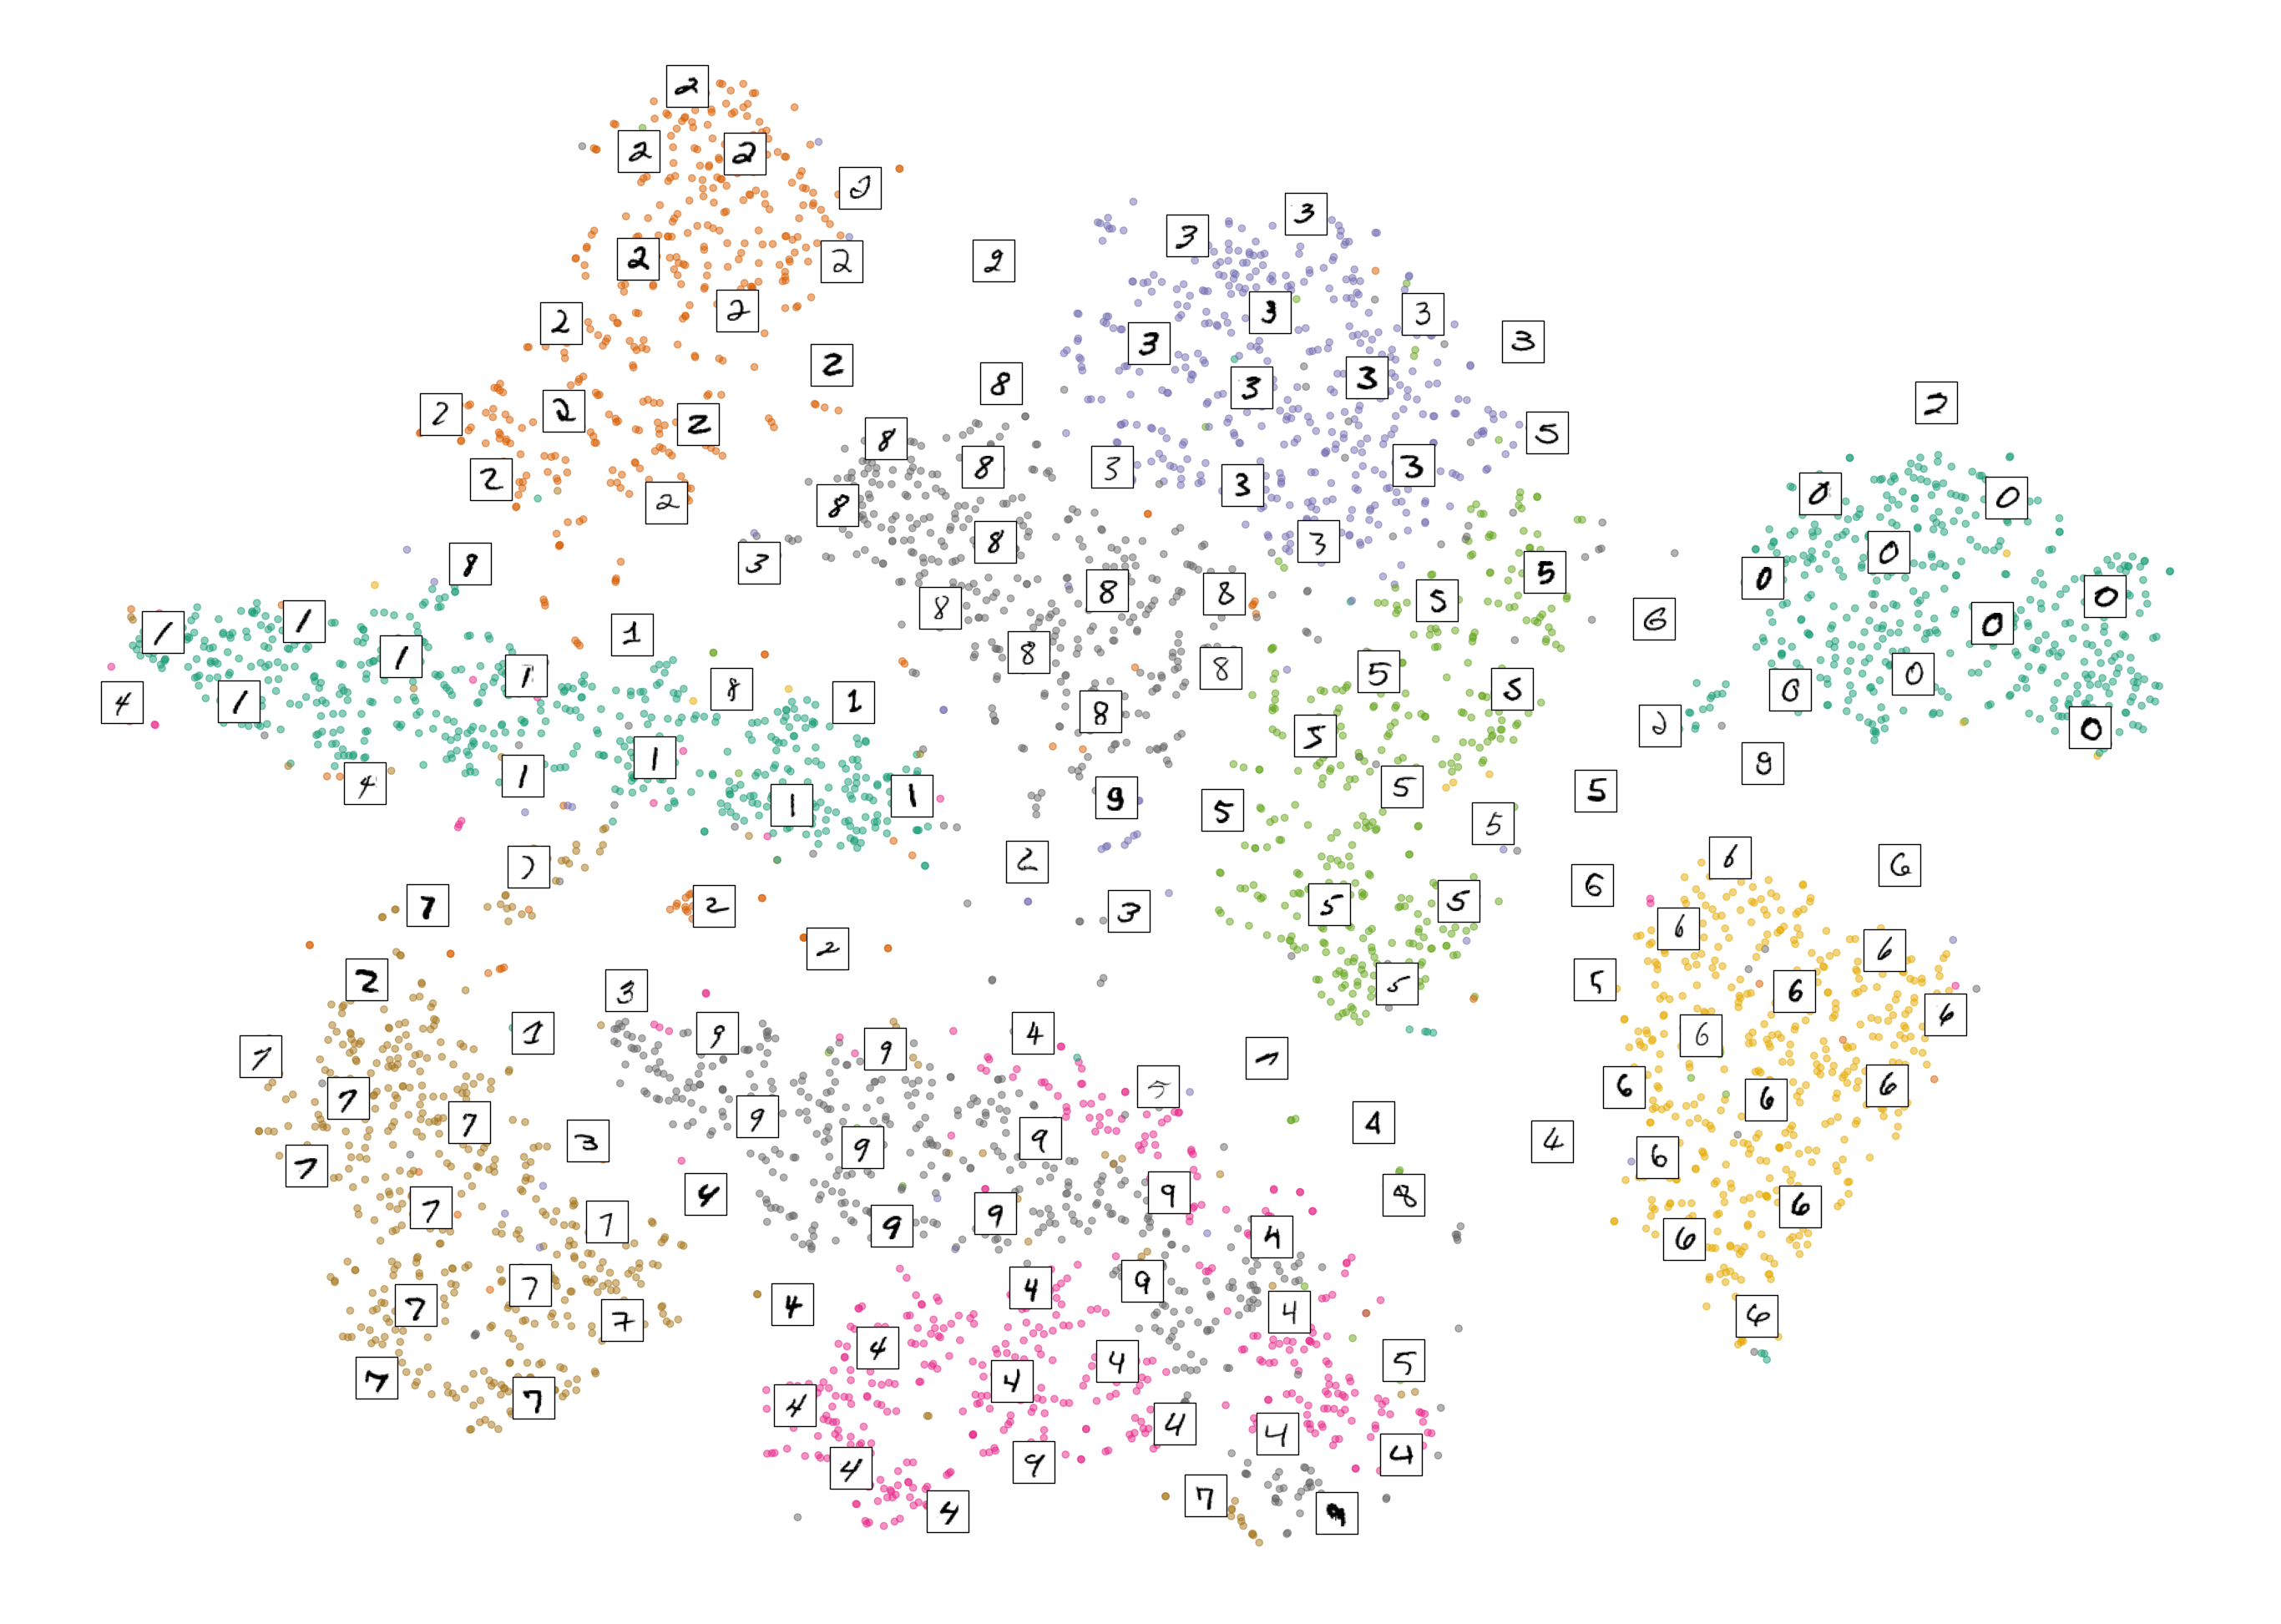

In [ ]:
# plotting the t-SNE results along with the images themselves
plot_embedding(reduced_data[0], y_sample, images=X_sample, figsize=(35, 25))

Note about PCA and t-SNE.

t-SNE's `init` parameter can be set to `"pca"`, but this just means that the embedding is initialized to the first `n_components` PCA coordinates, and the pairwise affinities are still computed from the original data and used to optimize the embedding via gradient descent. At first, I confused this with PCAing down to 50 dimensions and then t-SNEing down to 2 dimensions, in which case the PCA would affect the affinity computations of t-SNE.

# Exercise: API Practice

Takeaways:
1. Before you manually perform PCA, REMEMBER TO CENTER THE DATA
2. `explained_variance_ = s ** 2 / (X.shape[0] -1)`

## Part 1: plotting the swiss roll

In [ ]:
# make swiss roll
X, t = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.2, random_state=43)

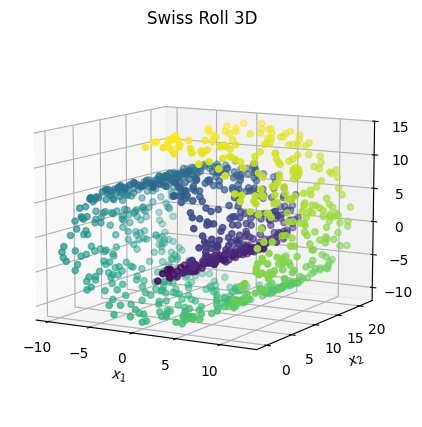

In [ ]:
# plot roll 3d
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(*X.T, c=t, cmap="viridis")

ax.view_init(10, -60)
ax.set_xlim(axes[:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title("Swiss Roll 3D")
plt.show()

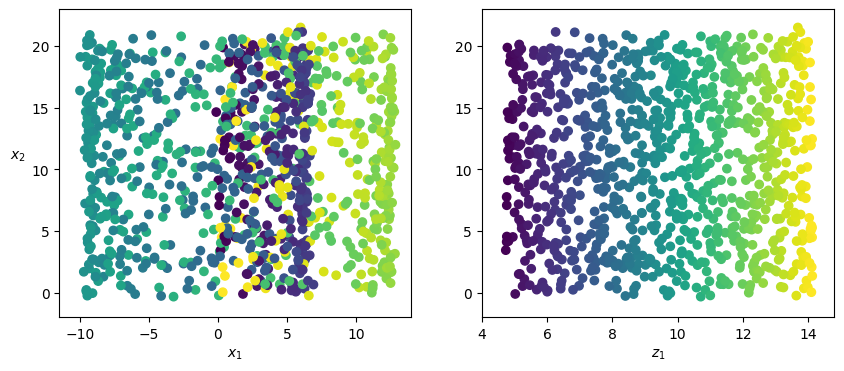

In [ ]:
# plot some 2d reductions of the roll (a good one and a bad one)
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax1.scatter(*X[:, 0:2].T, c=t, cmap="viridis")
ax1.set_xlim(axes[:2])
ax1.set_ylim(axes[2:4])
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$", labelpad=10, rotation=0)

ax2 = fig.add_subplot(122)
ax2.scatter(t, X[:, 1], c=t, cmap="viridis")
ax2.set_xlim(4, 14.8)
ax2.set_ylim(axes[2:4])
ax2.set_xlabel("$z_1$")

plt.show()

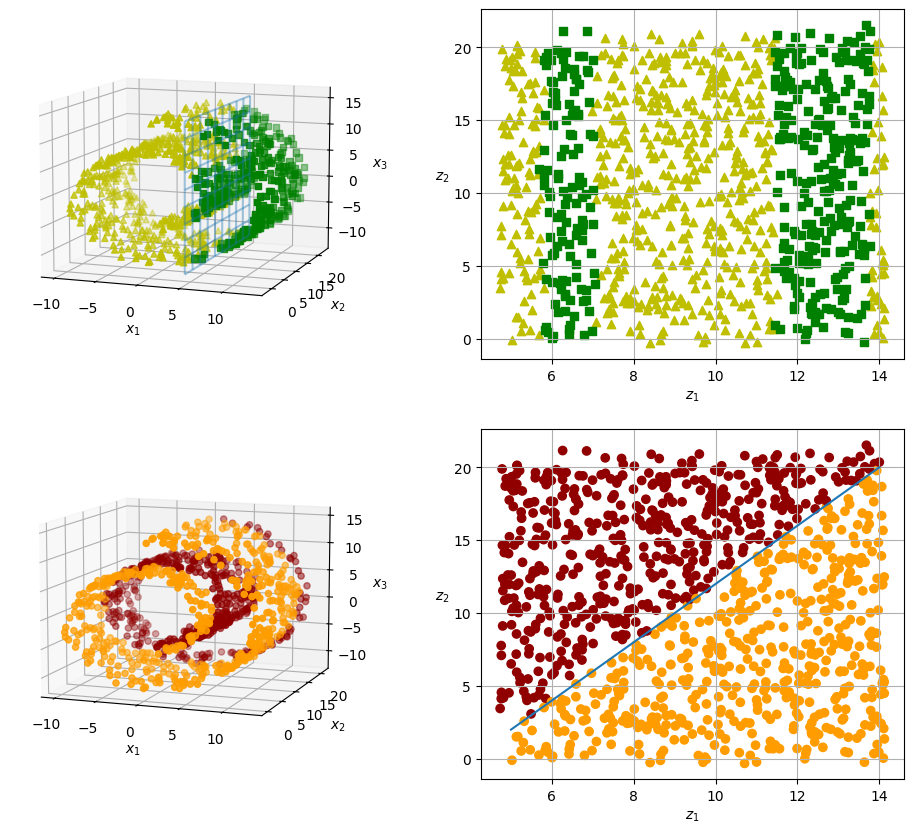

In [ ]:
# plot the swiss roll with two different decision boundaries

# setup
y = (X[:, 0] > 5).astype(int)

axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(*axes[2:4], 10)
x3s = np.linspace(*axes[4:6], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(12, 10))

# first boundary (first row)
ax1 = fig.add_subplot(221, projection="3d")
ax1.scatter(*X[y==0].T, c="y", marker="^")
ax1.plot_wireframe(5, x2, x3, alpha=0.4)
ax1.scatter(*X[y==1].T, c="g", marker="s")
ax1.view_init(10, -70)
ax1.xaxis.set_rotate_label(False)
ax1.yaxis.set_rotate_label(False)
ax1.zaxis.set_rotate_label(False)
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_zlabel("$x_3$")

ax2 = fig.add_subplot(222)
ax2.scatter(t[y==0], X[y==0, 1], c="y", marker="^")
ax2.scatter(t[y==1], X[y==1, 1], c="g", marker="s")
ax2.set_xlabel("$z_1$")
ax2.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax2.grid(True)

# setup
y = 2 * (t - 4) > X[:, 1]

from matplotlib.colors import ListedColormap
cmap = ListedColormap(plt.cm.hot(np.linspace(0.2, 0.6, 256)))

# second boundary (second row)
ax3 = fig.add_subplot(223, projection="3d")
ax3.scatter(*X.T, c=y, cmap=cmap)
ax3.view_init(10, -70)
ax3.xaxis.set_rotate_label(False)
ax3.yaxis.set_rotate_label(False)
ax3.zaxis.set_rotate_label(False)
ax3.set_xlabel("$x_1$")
ax3.set_ylabel("$x_2$")
ax3.set_zlabel("$x_3$")

ax4 = fig.add_subplot(224)
ax4.scatter(t, X[:, 1], c=y, cmap=cmap)
ax4.plot([5, 14], [2, 20])
ax4.set_xlabel("$z_1$")
ax4.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax4.grid(True)

plt.show()

## Part 2: PCA using just numpy

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [ ]:
X_full, y_full = sklearn.datasets.fetch_openml("mnist_784", as_frame=False, return_X_y=True)

In [ ]:
X, y = X_full[:10000], y_full[:10000]

In [ ]:
means_ = X.mean(axis=0)
X_centered = X - means_

In [ ]:
# decomposition
U, s, Vt = np.linalg.svd(X_centered)

# verifying
Sigma = np.zeros_like(X, dtype=float)
Sigma[ : len(s), : len(s)] = np.diag(s)
assert np.allclose(U @ Sigma @ Vt, X_centered)

Minimum number of dimensions to preserve 95% of the variance 149


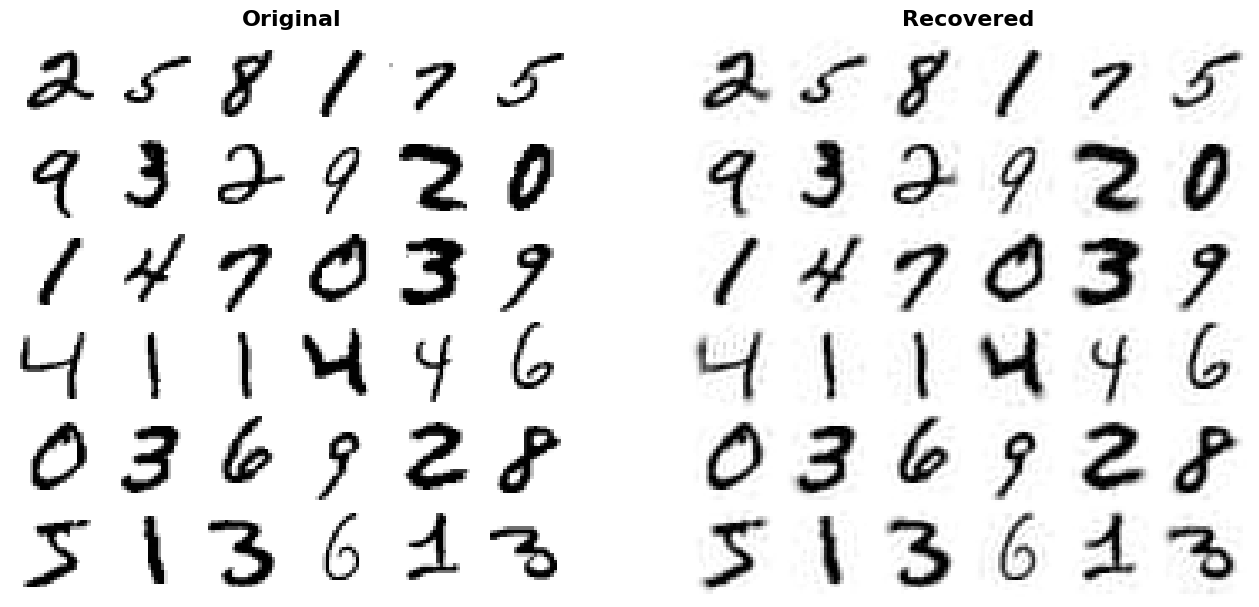

In [ ]:
# explained variance
n_components = 0.95
explained_variance_ = s ** 2 / (X_centered.shape[0] - 1)
cumsum = np.cumsum(explained_variance_)
n_components_ = np.argmax(cumsum > n_components * cumsum[-1]) # first true
print("Minimum number of dimensions to preserve 95% of the variance", n_components_)

# selection of dimensions and projection
V_d = Vt.T[:, : n_components_]
X_reduced = X_centered @ V_d

# reconstruction / reverse transform (projection + reconstruction = compression)
X_compressed = X_reduced @ V_d.T + means_

# comparing the compressed (recovered) images to the original
GRID_SIZE = 6
n_images = GRID_SIZE ** 2

fig = plt.figure(figsize=(16, 8))
for j, (title, Images) in enumerate(zip(["Original", "Recovered"], [X, X_compressed])):
    ax = fig.add_subplot(1, 2, j + 1)
    for idx, image in enumerate(Images[:n_images].reshape((-1, 28, 28))):
        row, col = idx // GRID_SIZE, idx % GRID_SIZE
        ax.imshow(image,
                  cmap="binary",
                  vmin=0, vmax=255,
                  extent=(row, row+1, col, col+1))
        ax.set(xlim=(0, GRID_SIZE), ylim=(0, GRID_SIZE))
        ax.set_axis_off()
    ax.set_title(title, fontdict={"weight": "bold", "size": 16})
plt.show()

## Part 3: Using PCA API

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
X_full, y_full = sklearn.datasets.fetch_openml("mnist_784", as_frame=False, return_X_y=True)

In [ ]:
X, y = X_full[:10000], y_full[:10000]

In [ ]:
# plain PCA
pca = PCA(n_components=0.95) # preserve 95% of the variance
X_reduced = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_reduced)

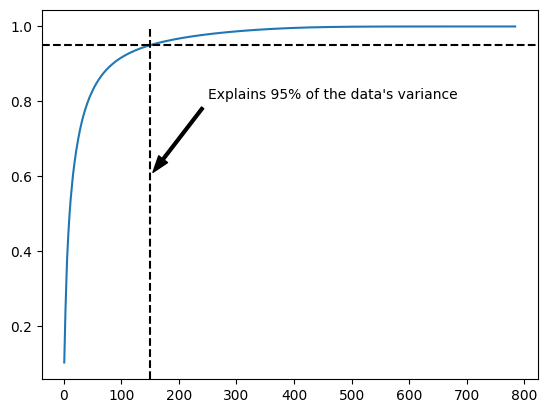

In [ ]:
# manually determining the number of components needed.
pca2 = PCA() # keeps all components
pca2.fit(X)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
n_components_ = 1 + np.argmax(cumsum > 0.95) # first one that is largest

plt.plot(np.arange(1, len(pca2.explained_variance_ratio_) +  1), cumsum)
plt.axvline(n_components_, ymax=cumsum[n_components_ - 1], linestyle="--", color="k")
plt.axhline(cumsum[n_components_ - 1], xmin=0, xmax=790, linestyle="--", color="k")
plt.annotate("Explains 95% of the data's variance",
             xy=(n_components_, 0.6), \
             xytext=(n_components_ + 100, 0.8),
             arrowprops=dict(facecolor='black', width=2, headwidth=8, shrink=0.05),
             horizontalalignment='left',
             verticalalignment='bottom'
)
plt.show()

In [ ]:
# Randomized PCA
rpca = PCA(n_components=150, svd_solver="randomized")
rpca.fit(X)

PCA(n_components=150, svd_solver='randomized')

In [ ]:
n_minibatch = 20

# Incremental PCA
ipca = IncrementalPCA(n_components=154)
for X_minibatch in np.array_split(X_full, n_minibatch):
    ipca.partial_fit(X_minibatch)

# memmap: a mapping between disk space and virtual memory (can be larger than actual memory)
filename = "my_mnist.mmap"
X_mm = np.memmap(filename, dtype=np.float32, mode="w+", shape=X_full.shape)
X_mm[:] = X_full # in actuality, you would probably have to store the data in stages
X_mm.flush()
del X_mm

# using ipca with memmap
X_mm = np.memmap(filename, dtype=np.float32, mode="r", shape=X_full.shape)
ipca2 = IncrementalPCA(n_components=154, batch_size=X_full.shape[0]//n_minibatch)
ipca2.fit(X_mm)

# comparing the results of these two data handling approaches
assert np.allclose(ipca.singular_values_, ipca2.singular_values_)


In [ ]:
# swiss roll: nonlinear data
X, t = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.2, random_state=43)

In [ ]:
# kernel pca, judging performance by the reconstruction error
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, fit_inverse_transform=True)
X_reduced = kpca.fit_transform(X)
X_reconstructed = kpca.inverse_transform(X_reduced)
reconstruction_error = np.sum((X_reconstructed - X)**2) / X.size # note you divide by size for multioutput mean squared error
print("reconstruction error of kernel pca using an rbf kernel:", round(reconstruction_error, 2))

reconstruction error of kernel pca using an rbf kernel: 27.91


In [ ]:
# gridsearchcv with kernelpca
y = t > 6.9
pipe = make_pipeline(KernelPCA(n_components=2, random_state=43),
                     LogisticRegression(solver="liblinear"))
param_grid = {
    "kernelpca__gamma": np.linspace(0.03, 0.05, 10),
    "kernelpca__kernel": ["rbf", "sigmoid"]
}
gscv = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1)
gscv.fit(X, y)
print(f"The kpca that yields the best results has a {gscv.best_params_['kernelpca__kernel']} kernel with gamma value {gscv.best_params_['kernelpca__gamma']}.")

The kpca that yields the best results has a rbf kernel with gamma value 0.043333333333333335.


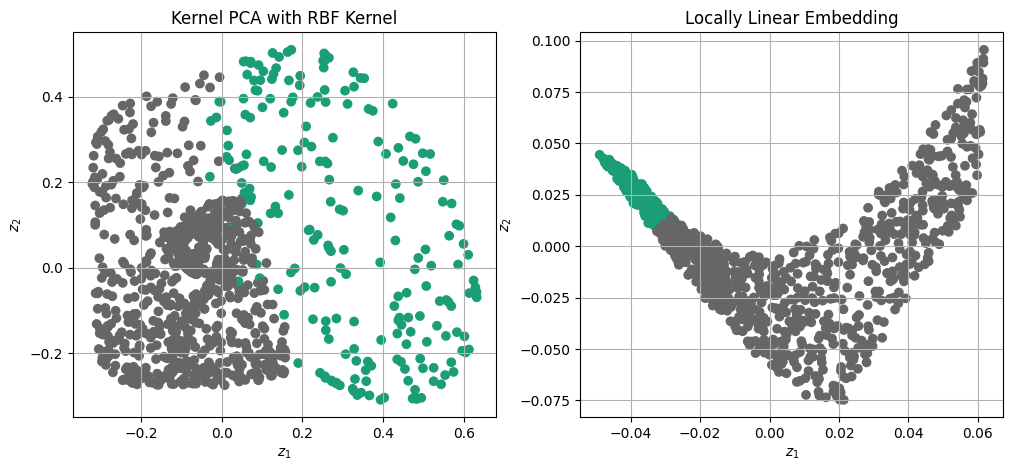

In [ ]:
# more api, though this is lle and not pca
collection = (
    ("Kernel PCA with RBF Kernel", KernelPCA(n_components=2, kernel="rbf", gamma=0.04333)),
    ("Locally Linear Embedding", LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=43))
)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for (name, transformer), ax in zip(collection, axes):
    X_reduced = transformer.fit_transform(X)
    ax.scatter(*X_reduced.T, c=y, cmap=plt.cm.Dark2)
    ax.set_xlabel("$z_1$")
    ax.set_ylabel("$z_2$")
    ax.set_title(name)
    ax.grid(True)
plt.show()